In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')
combine = [train, test]

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [7]:
train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending = False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [8]:
train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().sort_values(by='Survived', ascending = False)

,Survived
Sex,
female,0.742038
male,0.188908


In [9]:
train[['Pclass','Sex','Survived']].groupby(['Sex','Pclass'], as_index=True).mean().sort_values(by='Survived', ascending = False)

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

In [10]:
train[['Embarked','Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending = False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [11]:
train[['Pclass', 'Embarked','PassengerId']].groupby(['Embarked', 'Pclass'], as_index=True).count().sort_values(by='Embarked', ascending = True)

PassengerId
Embarked Pclass             
C        1                85
         2                17
         3                66
Q        1                 2
         2                 3
         3                72
S        1               127
         2               164
         3               353

In [12]:
train[['Sex', 'Embarked','PassengerId']].groupby(['Embarked', 'Sex'], as_index=True).count().sort_values(by='Embarked', ascending = True)

PassengerId
Embarked Sex                
C        female           73
         male             95
Q        female           36
         male             41
S        female          203
         male            441

In [13]:
train[['Sex', 'Embarked','Survived']].groupby(['Sex', 'Embarked'], as_index=True).mean().sort_values(by='Survived', ascending = False)

Survived
Sex    Embarked          
female C         0.876712
       Q         0.750000
       S         0.689655
male   C         0.305263
       S         0.174603
       Q         0.073171

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

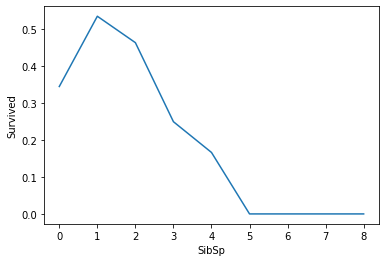

In [14]:
sib_sp = train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=True).mean().sort_values(by='Survived', ascending=False)
sns.lineplot(data=sib_sp, x='SibSp', y='Survived')

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

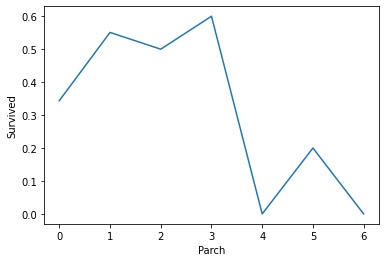

In [15]:
par_ch = train[["Parch", "Survived"]].groupby(['Parch'], as_index=True).mean().sort_values(by='Survived', ascending=False)
sns.lineplot(data=par_ch, x='Parch', y='Survived')

<AxesSubplot:xlabel='FamilySize', ylabel='Survived'>

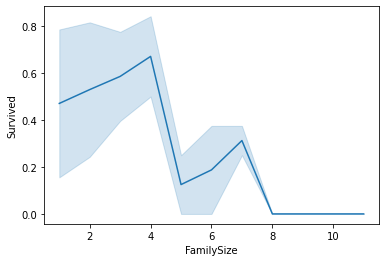

In [16]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

family_size = train[['FamilySize','Sex', 'Survived']].groupby(['Sex','FamilySize'], as_index=True).mean()
sns.lineplot(data=family_size, x='FamilySize', y='Survived')

<AxesSubplot:xlabel='FamilySize', ylabel='Survived'>

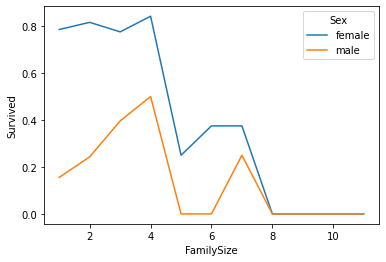

In [17]:
sns.lineplot(data=family_size, x='FamilySize', y='Survived', hue='Sex')

In [18]:
train[['FamilySize', 'PassengerId']].groupby(['FamilySize'], as_index=True).count()

,PassengerId
FamilySize,
1,537
2,161
3,102
4,29
5,15
6,22
7,12
8,6
11,7


In [19]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=True).mean()

,Survived
IsAlone,
0,0.505650
1,0.303538


In [20]:
train[['IsAlone','Sex', 'Survived']].groupby(['Sex','IsAlone'], as_index=True).mean()

Survived
Sex    IsAlone          
female 0        0.712766
       1        0.785714
male   0        0.271084
       1        0.155718

In [21]:
train = train.drop(['Parch', 'SibSp', 'IsAlone'], axis=1)
test = test.drop(['Parch', 'SibSp', 'IsAlone'], axis=1)
combine = [train, test]

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,1


In [22]:
for dataset in combine:
    dataset['CategoricalAge'] = pd.qcut(train['Age'], 5)

categorical_age = train[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=True).mean()
print(categorical_age)

                Survived
CategoricalAge          
(0.419, 19.0]   0.481707
(19.0, 25.0]    0.328467
(25.0, 31.8]    0.393701
(31.8, 41.0]    0.437500
(41.0, 80.0]    0.373239


In [23]:
for dataset in combine:
    dataset['CategoricalAge'] = pd.qcut(train['Age'], 15)

train[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=True).mean()

,Survived
CategoricalAge,
"(0.419, 7.0]",0.680000
"(7.0, 16.0]",0.420000
"(16.0, 19.0]",0.375000
"(19.0, 21.0]",0.200000
"(21.0, 23.0]",0.380952
"(23.0, 25.0]",0.381818
"(25.0, 27.0]",0.472222
"(27.0, 29.0]",0.319149
"(29.0, 31.8]",0.409091


<AxesSubplot:>

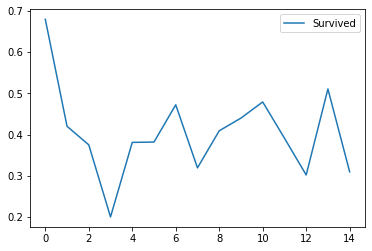

In [24]:
categorical_age = train[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean()
sns.lineplot(data=categorical_age)

In [25]:
train[['CategoricalAge', 'Sex','Survived']].groupby(['Sex', 'CategoricalAge'], as_index=True).mean()

Survived
Sex    CategoricalAge          
female (0.419, 7.0]    0.750000
       (7.0, 16.0]     0.600000
       (16.0, 19.0]    0.769231
       (19.0, 21.0]    0.444444
       (21.0, 23.0]    0.823529
       (23.0, 25.0]    0.761905
       (25.0, 27.0]    0.727273
       (27.0, 29.0]    0.714286
       (29.0, 31.8]    0.736842
       (31.8, 34.0]    0.928571
       (34.0, 37.0]    0.937500
       (37.0, 41.0]    0.714286
       (41.0, 47.0]    0.625000
       (47.0, 54.0]    0.888889
       (54.0, 80.0]    0.900000
male   (0.419, 7.0]    0.615385
       (7.0, 16.0]     0.240000
       (16.0, 19.0]    0.105263
       (19.0, 21.0]    0.129032
       (21.0, 23.0]    0.080000
       (23.0, 25.0]    0.147059
       (25.0, 27.0]    0.360000
       (27.0, 29.0]    0.151515
       (29.0, 31.8]    0.160000
       (31.8, 34.0]    0.250000
       (34.0, 37.0]    0.250000
       (37.0, 41.0]    0.120000
       (41.0, 47.0]    0.162162
       (47.0, 54.0]    0.275862
       (54.0, 80.0]    0.125000

<AxesSubplot:xlabel='CategoricalAge', ylabel='Survived'>

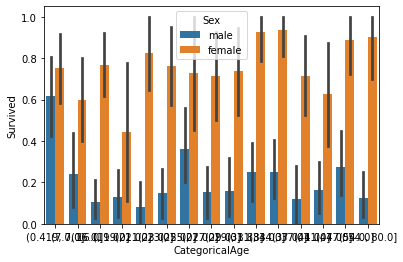

In [26]:
sns.barplot(data=train, x='CategoricalAge', y='Survived', hue='Sex')

In [27]:
for dataset in combine:
    dataset['IsKid'] = 0
    dataset.loc[dataset['Age'] <= 7, 'IsKid'] = 1

print(train[['IsKid', 'Survived']].groupby(['IsKid'], as_index=False).mean())

   IsKid  Survived
0      0  0.366231
1      1  0.680000


In [28]:
train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)
combine = [train, test]

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,FamilySize,CategoricalAge,IsKid
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,NaN,S,2,"(21.0, 23.0]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C85,C,2,"(37.0, 41.0]",0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,NaN,S,1,"(25.0, 27.0]",0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,C123,S,2,"(34.0, 37.0]",0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,NaN,S,1,"(34.0, 37.0]",0


### Cabin feature

**Cabin** has its own set of problems as well. The most flagrant is the number of missing values - 687 out of 891 passengers. Like **Ticket**, it has numbers and letters mixed. Letters represent decks, from A to G, and number the designated room. As seen below, that are lots of unique values, mostly representing classes (already covered by **Pclass** feature) and rooms, not important to predicting fates since it is unique. That again makes it difficult to find correlations.

In [29]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

However, the absence of something can signal something to us. We can try to correlate if the designation of a room to a passenger has any effect on the final outcome of the disaster.

For this task, the **HasCabin** feature will be created to assess it.

In [30]:
for dataset in combine:
    dataset['HasCabin'] = 1
    dataset.loc[dataset['Cabin'].isnull(), 'HasCabin'] = 0

train[['HasCabin', 'Survived']].groupby(['HasCabin'], as_index=True).mean()

,Survived
HasCabin,
0,0.299854
1,0.666667


In [31]:
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)
combine = [train, test]

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,CategoricalAge,IsKid,HasCabin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,2,"(21.0, 23.0]",0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,2,"(37.0, 41.0]",0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,1,"(25.0, 27.0]",0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,2,"(34.0, 37.0]",0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,1,"(34.0, 37.0]",0,0


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

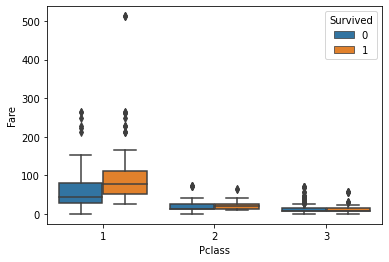

In [32]:
sns.boxplot(data=train, x='Pclass', y='Fare', hue='Survived')

In [33]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [34]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

'''train['Title'] = train['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')'''
    
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [35]:
train[['Title', 'Pclass', 'Survived']].groupby(['Title', 'Pclass'], as_index=False).mean()

,Title,Pclass,Survived
0,Master,1,1.000000
1,Master,2,1.000000
2,Master,3,0.392857
3,Miss,1,0.958333
4,Miss,2,0.942857
5,Miss,3,0.500000
6,Mr,1,0.345794
7,Mr,2,0.087912
8,Mr,3,0.112853
9,Mrs,1,0.976744


In [36]:
train.loc[train['Age'].isnull()].groupby(['Title'], as_index=False).count()

,Title,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,CategoricalAge,IsKid,HasCabin
0,Master,4,4,4,4,4,0,4,4,4,0,4,4
1,Miss,36,36,36,36,36,0,36,36,36,0,36,36
2,Mr,119,119,119,119,119,0,119,119,119,0,119,119
3,Mrs,17,17,17,17,17,0,17,17,17,0,17,17
4,Rare,1,1,1,1,1,0,1,1,1,0,1,1


In [37]:
pd.crosstab(train['Title'], train['CategoricalAge'])

CategoricalAge,"(0.419, 7.0]","(7.0, 16.0]","(16.0, 19.0]","(19.0, 21.0]","(21.0, 23.0]","(23.0, 25.0]","(25.0, 27.0]","(27.0, 29.0]","(29.0, 31.8]","(31.8, 34.0]","(34.0, 37.0]","(37.0, 41.0]","(41.0, 47.0]","(47.0, 54.0]","(54.0, 80.0]"
Title,,,,,,,,,,,,,,,
Master,26,10,0,0,0,0,0,0,0,0,0,0,0,0,0
Miss,24,23,19,9,13,11,6,4,13,4,7,7,2,4,3
Mr,0,15,38,31,24,34,24,32,25,35,32,23,34,23,28
Mrs,0,2,7,0,4,10,5,10,6,9,9,14,14,12,7
Rare,0,0,0,0,1,0,1,1,0,2,0,2,3,8,4


In [38]:
train.groupby(['Title'], as_index=False).count()

,Title,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,CategoricalAge,IsKid,HasCabin
0,Master,40,40,40,40,40,36,40,40,40,36,40,40
1,Miss,185,185,185,185,185,149,185,184,185,149,185,185
2,Mr,517,517,517,517,517,398,517,517,517,398,517,517
3,Mrs,126,126,126,126,126,109,126,125,126,109,126,126
4,Rare,23,23,23,23,23,22,23,23,23,22,23,23


In [39]:
train.loc[train['Title'] == 'Master']

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,CategoricalAge,IsKid,HasCabin,Title
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,21.0750,S,5,"(0.419, 7.0]",1,0,Master
16,17,0,3,"Rice, Master. Eugene",male,2.00,29.1250,Q,6,"(0.419, 7.0]",1,0,Master
50,51,0,3,"Panula, Master. Juha Niilo",male,7.00,39.6875,S,6,"(0.419, 7.0]",1,0,Master
59,60,0,3,"Goodwin, Master. William Frederick",male,11.00,46.9000,S,8,"(7.0, 16.0]",0,0,Master
63,64,0,3,"Skoog, Master. Harald",male,4.00,27.9000,S,6,"(0.419, 7.0]",1,0,Master
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,15.2458,C,3,NaN,0,0,Master
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,29.0000,S,3,"(0.419, 7.0]",1,0,Master
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.00,11.2417,C,2,"(7.0, 16.0]",0,0,Master
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,69.5500,S,11,NaN,0,0,Master
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,39.6875,S,6,"(0.419, 7.0]",1,0,Master


In [40]:
for dataset in combine:
    #missing_age = dataset.loc[dataset['Age'].isnull()]
    dataset.loc[dataset['Title'] == 'Master', 'IsKid'] = 1
    
train.loc[train['Title'] == 'Master']

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,CategoricalAge,IsKid,HasCabin,Title
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,21.0750,S,5,"(0.419, 7.0]",1,0,Master
16,17,0,3,"Rice, Master. Eugene",male,2.00,29.1250,Q,6,"(0.419, 7.0]",1,0,Master
50,51,0,3,"Panula, Master. Juha Niilo",male,7.00,39.6875,S,6,"(0.419, 7.0]",1,0,Master
59,60,0,3,"Goodwin, Master. William Frederick",male,11.00,46.9000,S,8,"(7.0, 16.0]",1,0,Master
63,64,0,3,"Skoog, Master. Harald",male,4.00,27.9000,S,6,"(0.419, 7.0]",1,0,Master
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,15.2458,C,3,NaN,1,0,Master
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,29.0000,S,3,"(0.419, 7.0]",1,0,Master
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.00,11.2417,C,2,"(7.0, 16.0]",1,0,Master
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,69.5500,S,11,NaN,1,0,Master
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,39.6875,S,6,"(0.419, 7.0]",1,0,Master


In [41]:
#drop (PassengerId, Name, Age, SibSp, Parch, Ticket, Fare, Cabin, Categorical Age, Title)
#correct IsKid

In [42]:
train = train.drop(['Name', 'PassengerId'], axis=1)
test = test.drop(['Name'], axis=1)
combine = [train, test]
train.shape, test.shape

((891, 11), (418, 11))

In [43]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,CategoricalAge,IsKid,HasCabin,Title
0,0,3,0,22.0,7.2500,S,2,"(21.0, 23.0]",0,0,Mr
1,1,1,1,38.0,71.2833,C,2,"(37.0, 41.0]",0,1,Mrs
2,1,3,1,26.0,7.9250,S,1,"(25.0, 27.0]",0,0,Miss
3,1,1,1,35.0,53.1000,S,2,"(34.0, 37.0]",0,1,Mrs
4,0,3,0,35.0,8.0500,S,1,"(34.0, 37.0]",0,0,Mr


In [44]:
freq_port = train.Embarked.dropna().mode()[0]

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,CategoricalAge,IsKid,HasCabin,Title
0,0,3,0,22.0,7.2500,S,2,"(21.0, 23.0]",0,0,Mr
1,1,1,1,38.0,71.2833,C,2,"(37.0, 41.0]",0,1,Mrs
2,1,3,1,26.0,7.9250,S,1,"(25.0, 27.0]",0,0,Miss
3,1,1,1,35.0,53.1000,S,2,"(34.0, 37.0]",0,1,Mrs
4,0,3,0,35.0,8.0500,S,1,"(34.0, 37.0]",0,0,Mr


In [45]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,CategoricalAge,IsKid,HasCabin,Title
0,0,3,0,22.0,7.2500,0,2,"(21.0, 23.0]",0,0,Mr
1,1,1,1,38.0,71.2833,1,2,"(37.0, 41.0]",0,1,Mrs
2,1,3,1,26.0,7.9250,0,1,"(25.0, 27.0]",0,0,Miss
3,1,1,1,35.0,53.1000,0,2,"(34.0, 37.0]",0,1,Mrs
4,0,3,0,35.0,8.0500,0,1,"(34.0, 37.0]",0,0,Mr


In [46]:
train = train.drop(['Age', 'Fare', 'CategoricalAge', 'Title'], axis=1)
test = test.drop(['Age', 'Fare', 'CategoricalAge', 'Title'], axis=1)
combine = [train, test]
train.shape, test.shape

((891, 7), (418, 7))

In [47]:
train.head()

,Survived,Pclass,Sex,Embarked,FamilySize,IsKid,HasCabin
0,0,3,0,0,2,0,0
1,1,1,1,1,2,0,1
2,1,3,1,0,1,0,0
3,1,1,1,0,2,0,1
4,0,3,0,0,1,0,0


In [48]:
test.head()

,PassengerId,Pclass,Sex,Embarked,FamilySize,IsKid,HasCabin
0,892,3,0,2,1,0,0
1,893,3,1,0,2,0,0
2,894,2,0,2,1,0,0
3,895,3,0,0,1,0,0
4,896,3,1,0,3,0,0


In [49]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 6), (891,), (418, 6))

In [50]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

82.38

In [51]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.875768
4,IsKid,2.604359
5,HasCabin,0.575597
2,Embarked,0.235839
3,FamilySize,-0.332492
0,Pclass,-0.818679


In [52]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.28

In [53]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.95

In [54]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

79.35

In [55]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

55.22

In [56]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


82.27

In [57]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

81.48

In [58]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

85.52

In [59]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

85.52

In [60]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,85.52
8,Decision Tree,85.52
1,KNN,83.95
0,Support Vector Machines,83.28
2,Logistic Regression,82.38
7,Linear SVC,82.27
6,Stochastic Gradient Decent,81.48
4,Naive Bayes,79.35
5,Perceptron,55.22


In [62]:
output = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })

output.to_csv('submission.csv', index=False)